In [1]:
import numpy as np
import pandas as pd
import os
from os.path import join, exists
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import json
from PIL import Image

# BADGE Reproduce

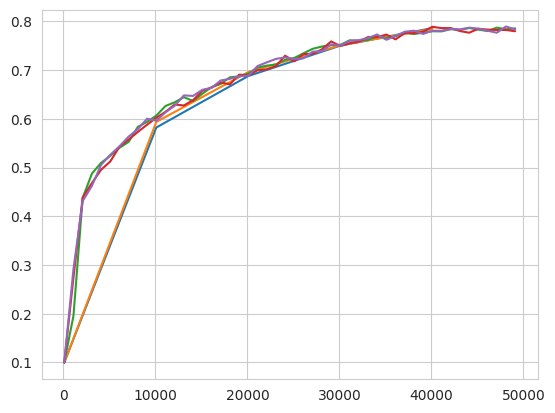

In [41]:
base = "runs/BadgeReprod/res"

def plot_badge(batchsize, trial):
    all_accs = []
    for seed in range(5):
        file = base + f"_{batchsize}_{trial}_{seed}.npy"
        acc = np.load(file)
        all_accs.append(acc)
    acc = np.stack(all_accs)
    acc_mean = np.mean(acc, axis=0)
    acc_std = np.std(acc, axis=0)
    x = np.arange(len(acc_mean)) * batchsize + 100
    plt.plot(x, acc_mean)

plot_badge(10000, 2)
plot_badge(10000, 3)
plot_badge(1000, 1)
plot_badge(1000, 2)
plot_badge(1000, 3)
plt.show()

# Steigung der Lernkurve

In [28]:
agents = ["RandomAgent", "Oracle", "Coreset_Greedy", "TypiClust", "MarginScore", "ShannonEntropy", "Badge", "BALD", ]
datasets = [("DNA", "MarginScore"), ("DNAEncoded", "TypiClust"),
            ("Splice", "BALD"), ("SpliceEncoded", "Coreset_Greedy"),
            ("USPS", "TypiClust"), ("USPSEncoded", "TypiClust"),
            ("Cifar10", "Badge"), ("Cifar10Encoded", "ShannonEntropy"),
            ("FashionMnist", "BALD"), ("FashionMnistEncoded", "Badge"),
            ("News", "MarginScore"), ("TopV2", "BALD"),
            ("DivergingSin", "ShannonEntropy"), ("ThreeClust", "Coreset_Greedy")]

for dataset, best_agent in datasets:
    file = os.path.join("runs", dataset, best_agent, "accuracies.csv")
    all_runs = pd.read_csv(file, header=0, index_col=0)
    mean = np.median(all_runs.values, axis=1)
    print(f"{dataset} - {best_agent} \t\t", end="")
    end_window = len(mean) // 5
    diff = mean[-1] - mean[-end_window]
    if diff < 0.02:
        print(f"converged with diff {diff}")
    else:
        print(f"NOT converged with diff {diff}")

    # min_improv = 0.05
    # window = min(len(mean), 100)
    # found_stop = False
    # for i in range(window, len(mean)):
    #     diff = mean[i] - mean[i-window]
    #     if diff < min_improv:
    #         print(f"Stopped at {i} with diff: {diff}")
    #         found_stop = True
    #         break
    # if not found_stop:
    #     print(f"Did not stop with final diff: {diff}")

DNA - MarginScore 		converged with diff 0.01180438448566612
DNAEncoded - TypiClust 		converged with diff 0.001264755480607116
Splice - BALD 		converged with diff 0.009425287356321865
SpliceEncoded - Coreset_Greedy 		converged with diff 0.010574712643678263
USPS - TypiClust 		converged with diff 0.003238664673642311
USPSEncoded - TypiClust 		converged with diff -0.010712506228201302
Cifar10 - Badge 		converged with diff 0.01980000000000004
Cifar10Encoded - ShannonEntropy 		converged with diff 0.010000000000000009
FashionMnist - BALD 		converged with diff 0.006699999999999928
FashionMnistEncoded - Badge 		converged with diff 0.013299999999999979
News - MarginScore 		converged with diff 0.009428571428571453
TopV2 - BALD 		converged with diff 0.011928571428571288
DivergingSin - ShannonEntropy 		converged with diff 0.0025000000000000577
ThreeClust - Coreset_Greedy 		converged with diff 0.004166666666666652


# Toydata

Loaded dataset: DivergingSin
| Number of classes: 2
| Labeled Instances: 20
| Unlabeled Instances: 1260
| Val Instances 320
| Test Instances 400


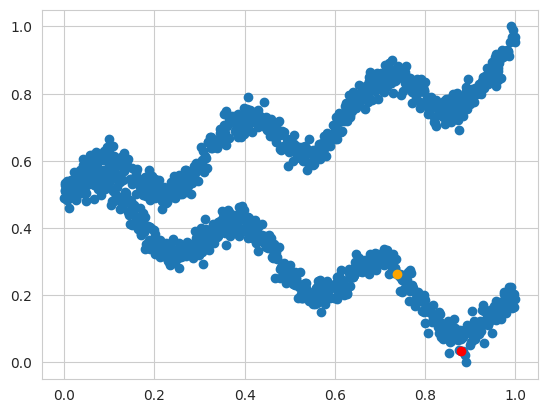

In [29]:
from datasets.sythData import DivergingSin
import yaml

with open(f"configs/divergingsin.yaml", 'r') as f:
    config = yaml.load(f, yaml.Loader)

dataset = DivergingSin("", config, pool_rng = np.random.default_rng(20), encoded=False)

fig, ax = plt.subplots()
ax.scatter(dataset.x_train[:,0], dataset.x_train[:,1])
ax.scatter(dataset.x_labeled[0, 0], dataset.x_labeled[0, 1], c="r")
ax.scatter(dataset.x_labeled[1, 0], dataset.x_labeled[1, 1], c="orange")

plt.show()

Loaded dataset: DivergingSin
| Number of classes: 2
| Labeled Instances: 20
| Unlabeled Instances: 1260
| Val Instances 320
| Test Instances 400


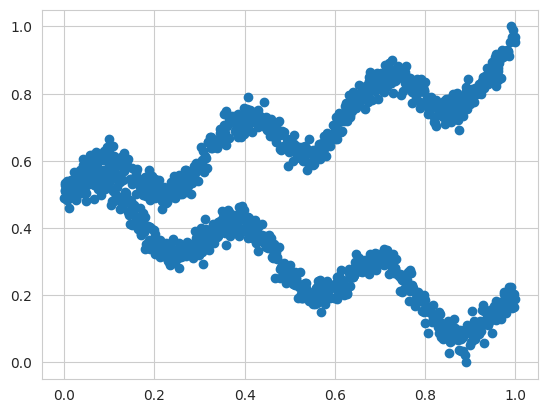

In [5]:
from datasets.sythData import DivergingSin
import yaml

with open(f"configs/divergingsin.yaml", 'r') as f:
    config = yaml.load(f, yaml.Loader)

dataset = DivergingSin("", config, pool_rng = np.random.default_rng(20), encoded=False)

fig, ax = plt.subplots()
ax.scatter(dataset.x_train[:,0], dataset.x_train[:,1])

plt.show()

In [50]:
def plot_synthdata(dataset, name, dot_size):
    class_indices = np.argmax(dataset.y_train, axis=1)
    matched_data = [(dataset.x_train[i], class_indices[i]) for i in range(len(dataset.x_train))]

    pos_cls = []
    neg_cls = []

    for data in matched_data:
        if data[1] == 0:
            pos_cls.append(data[0])
        else:
            neg_cls.append(data[0])

    pos_x = [tensor[0].item() for tensor in pos_cls]
    pos_y = [tensor[1].item() for tensor in pos_cls]

    neg_x = [tensor[0].item() for tensor in neg_cls]
    neg_y = [tensor[1].item() for tensor in neg_cls]


    fig, ax = plt.subplots()
    ax.scatter(pos_x, pos_y, s=dot_size, label = 'Positive Class')
    ax.scatter(neg_x, neg_y, s=dot_size, label = 'Negative Class')
    plt.title(name + ' Dataset')
    plt.legend()
    plt.show()

Loaded dataset: DivergingSin
| Number of classes: 2
| Labeled Instances: 20
| Unlabeled Instances: 1260
| Val Instances 320
| Test Instances 400


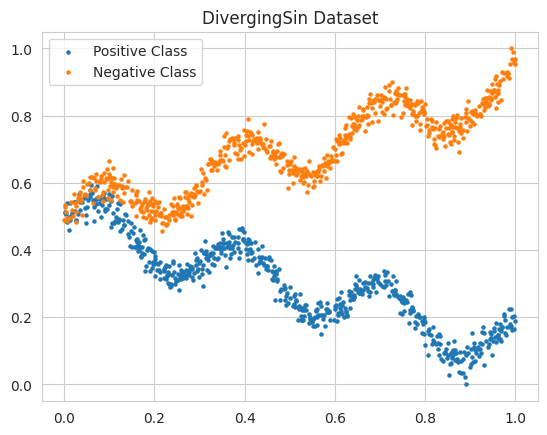

In [51]:
from datasets.sythData import DivergingSin

dataset_sin = DivergingSin("", config, pool_rng = np.random.default_rng(20), encoded=False)
plot_synthdata(dataset_sin,  'DivergingSin', 5)


Loaded dataset: ThreeClust
| Number of classes: 2
| Labeled Instances: 20
| Unlabeled Instances: 364
| Val Instances 96
| Test Instances 120


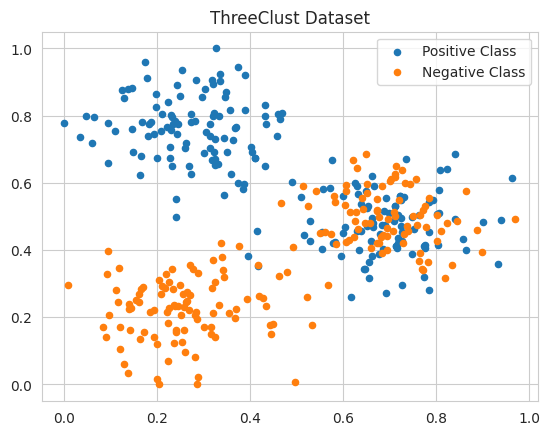

In [55]:
from datasets.sythData import ThreeClust

dataset_3Clust = ThreeClust("", config, pool_rng = np.random.default_rng(20), encoded=False)
plot_synthdata(dataset_3Clust,  'ThreeClust', 20)

# Mean / STD convergence

In [30]:
def shuffle(v):
    ids = np.arange(len(v))
    np.random.shuffle(ids)
    return v[ids]

def auc(values):
    v = np.sum(values, axis=1) / values.shape[1]
    return np.squeeze(v)

def mean_std_curves(inpt):
    mean_develop = [np.median(inpt[:i]) for i in range(1, len(inpt) + 1)]
    # median_develop = [np.median(inpt[:i]) for i in range(1, len(inpt) + 1)]
    std_develop = [np.std(inpt[:i]) for i in range(1, len(inpt) + 1)]
    return mean_develop, std_develop

def plot(ax, points, trajectories, twin, color, title):
    # ax.set_ylabel("mean")
    ax.set_xlabel("eval run")
    ax.scatter(range(len(points)), points, c="r", s=9, alpha=0.3)
    ax.grid()
    if twin:
        ax2 = ax.twinx()
    else:
        ax2 = ax
    for line in trajectories:
        ax2.plot(line, c=color, alpha=0.3)
    ax2.grid()
    ax.set_title(title)

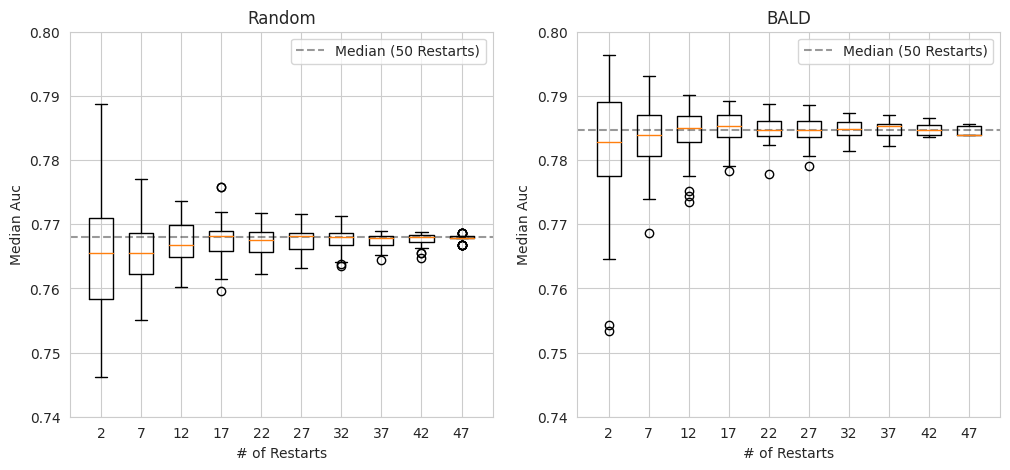

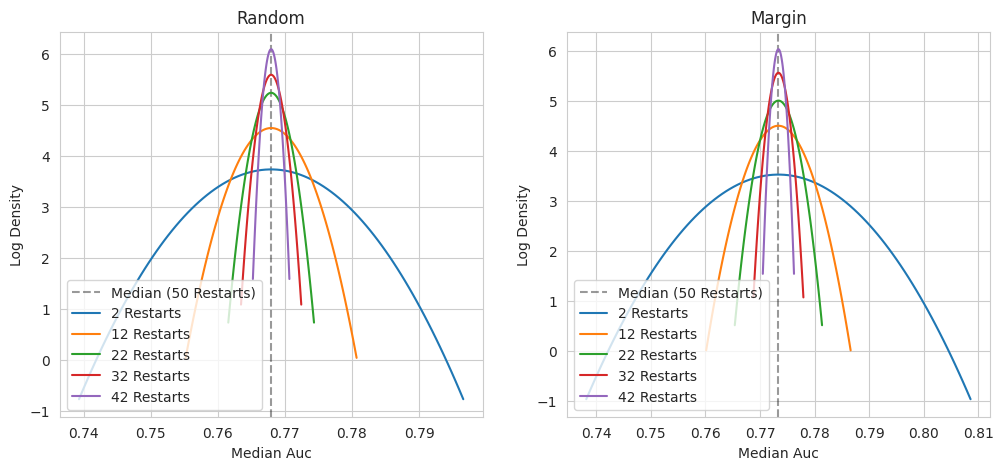

In [36]:
import scipy.stats as stats

def do_box(ax, file, title, y_min, y_max):
    accuracies = pd.read_csv(file, header=0, index_col=0)
    values = auc(accuracies.values.T)
    true_median = np.median(values)
    medians = []
    sizes = []
    for size in range(2, len(values), 5):
        current = []
        for _ in range(50):
            v = shuffle(values)[:size]
            current.append(np.median(v))
        medians.append(current)
        sizes.append(size)
    ax.axhline(true_median, label="Median (50 Restarts)", linestyle="--", c="black", alpha=0.4)
    # ax.axhline(0.814, label="Oracle", linestyle="--", c="red", alpha=0.4)
    ax.boxplot(medians, widths=3, positions=sizes)
    ax.set_xlabel("# of Restarts")
    ax.set_ylabel("Median Auc")
    ax.set_title(title)
    ax.set_ylim(y_min, y_max)
    ax.legend()

def do_normal(ax, file, title):
    accuracies = pd.read_csv(file, header=0, index_col=0)
    values = auc(accuracies.values.T)
    true_median = np.median(values)
    ax.axvline(true_median, label="Median (50 Restarts)", linestyle="--", c="black", alpha=0.4)
    for size in range(2, len(values), 10):
        current = []
        for _ in range(50):
            v = shuffle(values)[:size]
            current.append(np.median(v))
        std = np.std(current)
        x = np.linspace(true_median - 3*std, true_median + 3*std, 100)
        ax.plot(x, stats.norm.logpdf(x, true_median, std), label=f"{size} Restarts")
    ax.set_xlabel("Median Auc")
    ax.set_ylabel("Log Density")
    ax.set_title(title)
    # ax.set_yscale("log")
    ax.legend()

np.random.seed(2023)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
do_box(ax1, "runs/Splice/RandomAgent/accuracies.csv", "Random", 0.74, 0.8)
do_box(ax2, "runs/Splice/BALD/accuracies.csv", "BALD", 0.74, 0.8)
plt.savefig("doc/img/ablation_restarts.jpg")
plt.show()
plt.close(fig)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
do_normal(ax1, "runs/Splice/RandomAgent/accuracies.csv", "Random")
do_normal(ax2, "runs/Splice/MarginScore/accuracies.csv", "Margin")
plt.savefig("doc/img/ablation_restarts_2.jpg")
plt.show()
plt.close(fig)


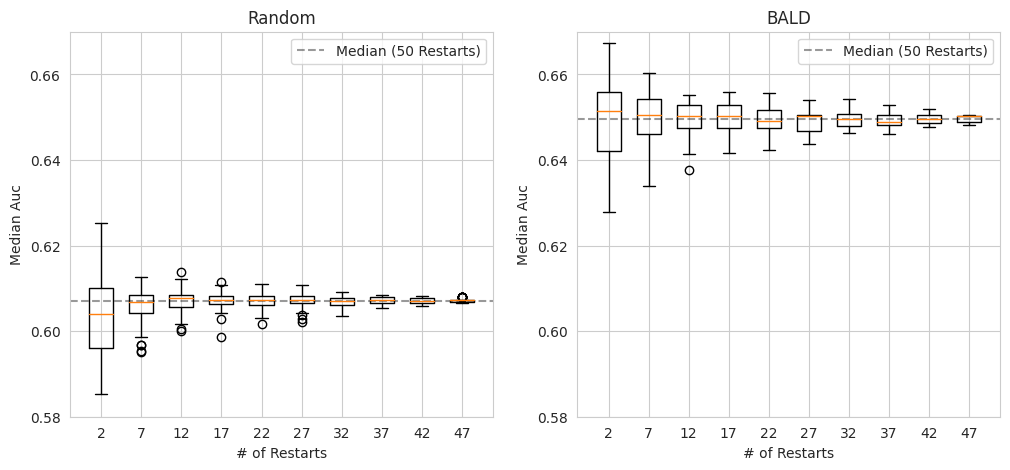

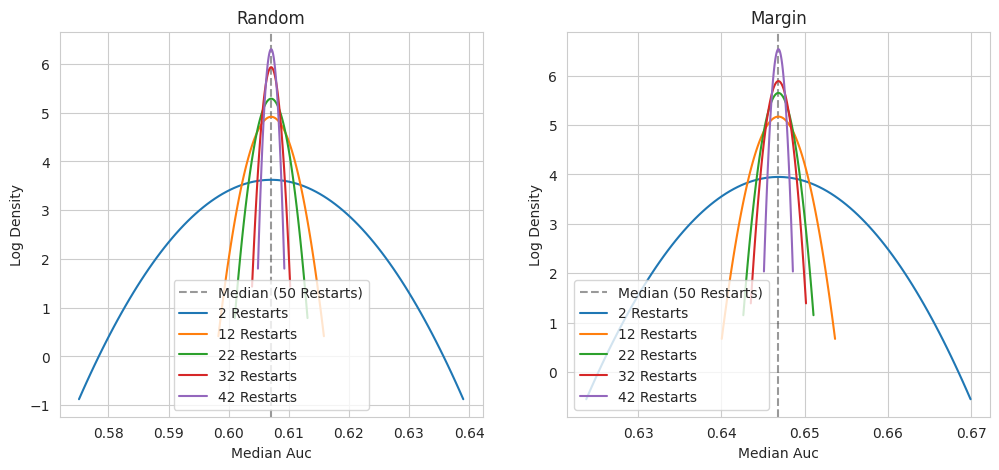

In [40]:
np.random.seed(2023)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
do_box(ax1, "runs/Cifar10Encoded/RandomAgent/accuracies.csv", "Random", 0.58, 0.67)
do_box(ax2, "runs/Cifar10Encoded/BALD/accuracies.csv", "BALD", 0.58, 0.67)
plt.savefig("doc/img/ablation_cifar_restarts.jpg")
plt.show()
plt.close(fig)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
do_normal(ax1, "runs/Cifar10Encoded/RandomAgent/accuracies.csv", "Random")
do_normal(ax2, "runs/Cifar10Encoded/MarginScore/accuracies.csv", "Margin")
plt.savefig("doc/img/ablation_cifar_restarts_2.jpg")
plt.show()
plt.close(fig)


# Visualizing trajectories

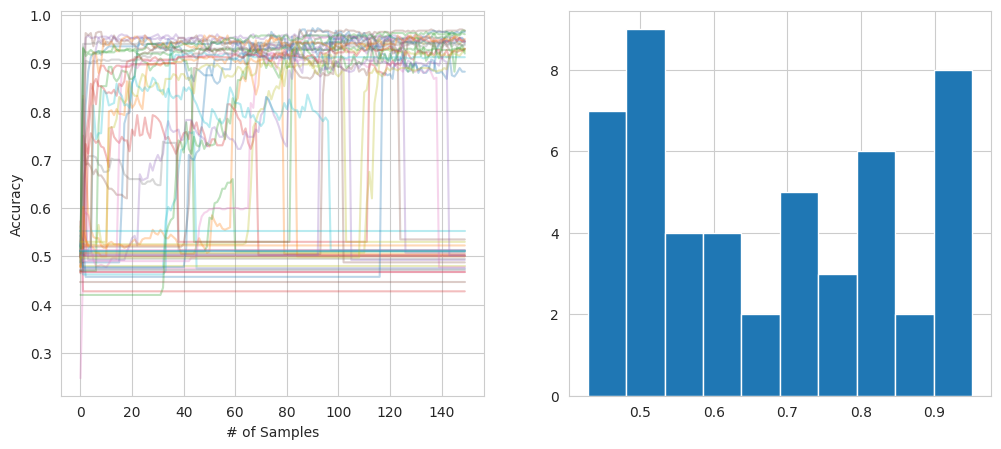

In [33]:
def view_trajectories(ax, file):
    accuracies = pd.read_csv(file, header=0, index_col=0)
    values = accuracies.values.T
    for line in values:
        ax.plot(line, alpha=0.3)
    ax.set_xlabel("# of Samples")
    ax.set_ylabel("Accuracy")

def view_hist(ax, file):
    accuracies = pd.read_csv(file, header=0, index_col=0)
    values = auc(accuracies.values.T)
    ax.hist(values)

file = "runs/DivergingSin/BALD/accuracies.csv"
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
view_trajectories(ax1, file)
view_hist(ax2, file)
plt.show()
plt.close(fig)

# Tukey Test for Statistical Significance

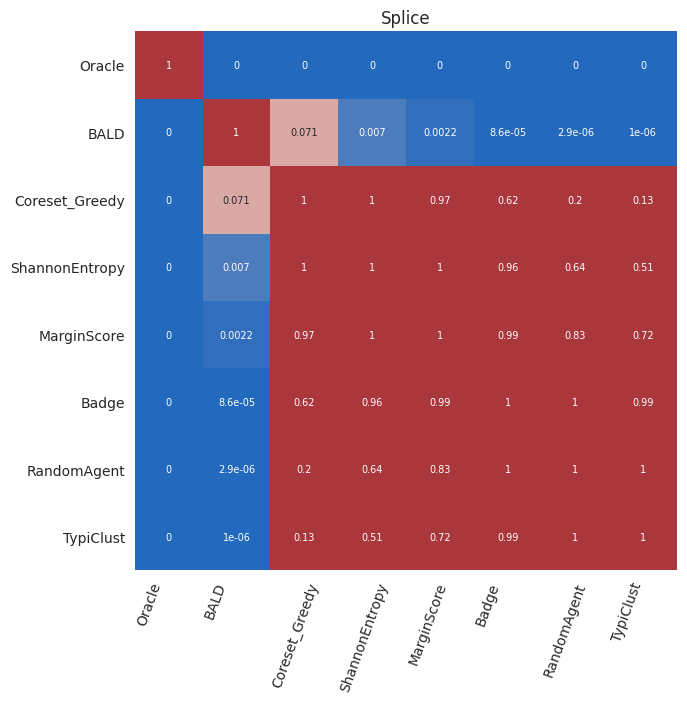

In [34]:
from scipy.stats import tukey_hsd
import os
from os.path import exists, join
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def _pad_nans_with_last_value(df:pd.DataFrame):
    max_len = len(df)
    for col in df:
        diff = max_len - sum(pd.notna(df[col]))
        if diff > 0:
            last_val = df[col][sum(pd.notna(df[col])) - 1]
            df[col] = pd.concat([df[col].iloc[:-diff], pd.Series([last_val]*diff)], ignore_index=True)
    return df

def do_tukey(agents, dataset):
    dataset_folder = os.path.join("runs", dataset)
    all_means = []
    all_aucs = []

    for agent in agents:
        agent_folder = join(dataset_folder, agent)
        if exists(agent_folder):
            acc_file = join(agent_folder, "accuracies.csv")
            if exists(acc_file):
                accuracies = pd.read_csv(acc_file, header=0, index_col=0)
                accuracies = _pad_nans_with_last_value(accuracies)
                values = accuracies.values
                auc = np.sum(values, axis=0) / values.shape[0]
                means = np.mean(auc).item()
                all_means.append(means)
                all_aucs.append(auc)
        else:
            print(f"{agent} is missing for {dataset}")
    z = zip(all_means, all_aucs, agents)
    z = sorted(z)
    all_means, all_aucs, agents = zip(*z)
    all_means = all_means[::-1]
    all_aucs = all_aucs[::-1]
    agents = agents[::-1]
    res = tukey_hsd(*all_aucs)

    p = (res.pvalue > 0.05).astype(int)
    fig, ax = plt.subplots(figsize=(7,7))
    cmap = sns.color_palette("vlag", as_cmap=True)
    sns.heatmap(res.pvalue, ax=ax, cmap=cmap, cbar=False,
                vmin=0, vmax=0.1, center=0.05,
                annot=True, annot_kws={"size": 7})
    ax.set_yticks(np.arange(len(agents)), agents, rotation=0)
    for label in ax.yaxis.get_majorticklabels():
        offset = matplotlib.transforms.ScaledTranslation(0, -0.35, fig.dpi_scale_trans)
        label.set_transform(label.get_transform() + offset)
    ax.set_xticks(np.arange(len(agents)), agents, rotation=70, ha="left")


agents = ["Oracle", "Coreset_Greedy", "TypiClust", "MarginScore", "ShannonEntropy", "RandomAgent", "Badge", "BALD", ]
vector_data = ["Splice", "DNA", "USPS"]
enc_vector_data = ["SpliceEncoded", "DNAEncoded", "USPSEncoded"]
img_data = ["Cifar10Encoded", "FashionMnistEncoded"]
text_data = ["TopV2", "News"]

res = do_tukey(agents, "Splice")
plt.title("Splice")
print()

In [35]:
fig.axes[0]


<AxesSubplot: xlabel='# of Samples', ylabel='Accuracy'>